# Harris detector 

a) Assume 𝜎0 = 0.5 as the smoothing of the input image. Compute the first derivative matrixes (Ix , Iy) at a scale 𝜎𝐷 = 1.4𝜎0 . Differential masks of size 2 can be used.

Derivative filters are sensitive to noise, so smooth image before running derivative filters

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


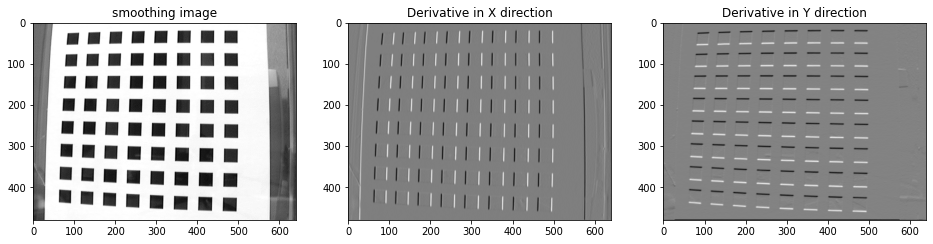

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D kernel by hand
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 

## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create fx fy by using Prewitt kernel
fx = np.array((
	[1, 0, -1],
	[1, 0, -1],
	[1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

fy = np.array((
	[1, 1, 1],
	[0, 0, 0],
	[-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 


# compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
Ix = convolve(img, fx)
Iy = convolve(img, fy)
Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))


## plot output images
mp.figure(figsize = (16,16))
mp.subplot(1,3,1)
mp.title('smoothing image')
mp.imshow(img, cmap = 'gray')
mp.subplot(1,3,2)
mp.title('Derivative in X direction')
mp.imshow(Ix, cmap = 'gray')
# mp.imshow(abs(Ix)*(255.0/abs(Ix).max()), cmap = 'gray') # show rescale image  
mp.subplot(1,3,3)
mp.title('Derivative in Y direction')
mp.imshow(Iy, cmap = 'gray')
# mp.imshow(abs(Iy)*(255.0/abs(Ix).max()), cmap = 'gray') # show rescale image  
mp.show()



b) Compute the three matrixes: Ix2, Iy2, IxIy

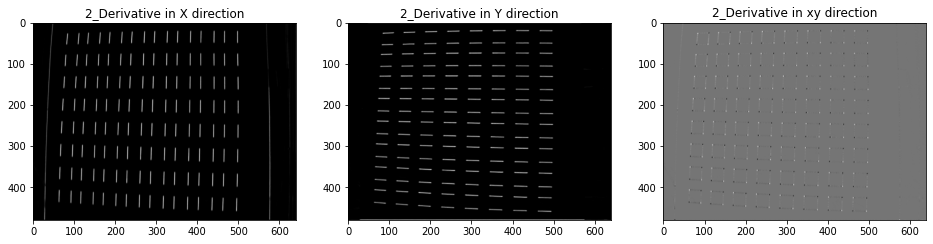

In [5]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  


## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 


  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)


## plot output images
mp.figure(figsize = (16,16))
mp.subplot(1,3,1)
mp.title('2_Derivative in X direction')
mp.imshow(Ixx, cmap = 'gray')
mp.subplot(1,3,2)
mp.title('2_Derivative in Y direction')
mp.imshow(Iyy, cmap = 'gray')
mp.subplot(1,3,3)
mp.title('2_Derivative in xy direction')
mp.imshow(Ixy, cmap = 'gray')
# mp.imshow(abs(Ixy)*(255.0/abs(Ixy).max()), cmap = 'gray') # show rescale image  

mp.show()


c) Compute at each pixel where possible, according to the used integration
window's size, the second-moment matrix. To do it, convolve the three matrices in point (c) with an isotropic 2D Gaussian of sigma value 𝜎𝐼 = 1.5𝜎𝐷.
Compute Trace and Determinant in each pixel. Discard those points too near to the
image borders






In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  


## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out


## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 


  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## Compute Trace and Determinant in each pixel
w,h = img.shape
detM = np.zeros((w, h), np.float32) # initiate detM array 
traceM= np.zeros((w, h), np.float32) # initiate traceM array 

for row in range(w):
  for col in range(h):
    M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
    detM[row][col] = np.linalg.det(M) # Determinant 
    traceM[row][col] = np.trace(M) # Trace

print(detM)
print(traceM)



[[16829060.   24080230.   10650877.   ...  3440123.2   3876604.
   2423004.  ]
 [26510784.   35753460.   15402018.   ...  5714519.    6299227.5
   3975426.2 ]
 [13724788.   17849086.    7570255.   ...  2931279.    3404091.2
   2207712.8 ]
 ...
 [  792167.    1135105.8    564005.44 ...  1243241.4   2574717.5
   2193668.2 ]
 [ 1421862.    2188022.8   1141877.9  ...  3068695.8   6102256.
   4947283.  ]
 [  896795.1   1486967.9    812752.9  ...  2610070.5   4910806.5
   3709112.  ]]
[[10120.486  12668.808  12895.535  ...  8068.742   6390.747   4206.8076]
 [12686.814  13017.963  10626.3545 ...  6906.008   6110.4478  4745.095 ]
 [13002.729  10668.803   5681.824  ...  4116.917   4715.51    4692.281 ]
 ...
 [ 3286.5698  2840.3843  1557.4225 ...  2246.5476  3574.4692  4428.178 ]
 [ 3202.4165  3320.6462  2630.643  ...  4373.9565  5014.233   4844.221 ]
 [ 2467.3103  3062.2893  3037.433  ...  5223.6143  5200.723   4220.9707]]


d) Apply the Harris-corner criteria to compute the Harris-feature map.

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]), ) # Prewitt kernel in horizontal direction 


  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)


def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)

print(R)



[[10683605.   14450309.     673187.1  ...  -466152.72  1426105.
   1361170.2 ]
 [16853470.   25585418.    8626853.   ...  2852942.    4058973.
   2624470.8 ]
 [ 3580530.8  11019685.    5633267.5  ...  1914338.8   2069929.4
    886663.  ]
 ...
 [  144074.52   651038.8    418471.56 ...   940422.9   1808107.6
   1017142.44]
 [  806533.75  1526421.2    726660.94 ...  1920806.    4593704.
   3539294.  ]
 [  531537.94   924310.94   259192.92 ...   972901.6   3287955.2
   2640116.5 ]]


e) Identify the local maxima applying Non-Maxima suppression on the 5x5 neighborhood (see hint below).

In [3]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  
# img = img.astype(np.float32)

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 

## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 


  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)


def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  # return abs(R)
  # return R.astype(np.uint8)
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select Strong Corner above threshold

  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points

Selected_Points=Strong_Corner(img,R,400) # compute selected strong points   
print(len(Selected_Points)) # show the number of selected strong points
print(Selected_Points) # show the selected strong points   


2472
[(1, 1), (1, 49), (1, 567), (1, 618), (1, 638), (2, 35), (2, 627), (3, 13), (3, 591), (3, 600), (4, 554), (6, 18), (6, 38), (6, 579), (7, 26), (7, 584), (7, 611), (7, 625), (9, 605), (10, 11), (10, 18), (10, 30), (10, 553), (10, 590), (10, 598), (11, 42), (12, 564), (12, 575), (12, 634), (13, 3), (14, 24), (14, 597), (14, 606), (15, 580), (15, 584), (15, 630), (16, 611), (16, 625), (17, 37), (18, 15), (18, 331), (18, 572), (18, 630), (18, 633), (19, 24), (19, 326), (19, 353), (19, 382), (19, 410), (19, 439), (19, 467), (19, 496), (19, 576), (19, 584), (19, 593), (20, 36), (20, 270), (20, 297), (20, 602), (21, 3), (21, 50), (21, 216), (21, 242), (21, 607), (22, 10), (22, 188), (22, 367), (22, 375), (22, 419), (22, 425), (22, 432), (22, 599), (22, 611), (23, 42), (23, 162), (23, 313), (23, 318), (23, 480), (23, 488), (23, 624), (24, 20), (24, 111), (24, 136), (24, 251), (24, 263), (25, 85), (25, 200), (25, 204), (25, 579), (25, 584), (26, 303), (26, 599), (26, 606), (27, 24), (27, 2

f) Sort the local maxima to decrease the order of Harris-value and go through the list eliminating the weaker points at a distance less than a given threshold of one with a higher value (see hint below).

g) Fix a threshold to keep only with the first 1000 highest values.

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out


## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 


  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)


def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,7020) # compute selected strong points   
  
print(len(Selected_Points)) # show the number of selected strong points
print(Selected_Points) # show the selected strong points   


1000
[(1, 1), (1, 49), (1, 567), (1, 618), (1, 638), (2, 35), (2, 627), (3, 13), (3, 591), (3, 600), (7, 611), (10, 598), (14, 597), (15, 630), (16, 611), (18, 630), (18, 633), (19, 326), (19, 353), (19, 382), (19, 410), (19, 439), (19, 467), (19, 496), (19, 584), (19, 593), (20, 270), (20, 297), (21, 216), (21, 242), (21, 607), (22, 188), (22, 367), (22, 375), (22, 419), (22, 425), (22, 432), (23, 42), (23, 162), (23, 313), (23, 318), (23, 480), (23, 488), (24, 20), (24, 111), (24, 136), (24, 251), (24, 263), (25, 85), (25, 200), (25, 204), (25, 584), (27, 24), (27, 28), (27, 358), (27, 572), (28, 93), (29, 203), (30, 414), (31, 40), (32, 106), (34, 3), (34, 321), (35, 26), (35, 140), (36, 378), (37, 492), (37, 565), (37, 572), (39, 612), (40, 301), (41, 205), (41, 210), (41, 265), (41, 412), (42, 139), (43, 375), (44, 259), (44, 304), (44, 364), (44, 579), (44, 621), (45, 198), (46, 573), (47, 39), (47, 325), (47, 352), (47, 381), (47, 409), (47, 439), (47, 467), (48, 3), (48, 241), 

h) Refine the spatial coordinates of each KeyPoint using OpenCV's function
cornerSubPix on a window of size 5x5.

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out


## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 


  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,7020) # compute selected strong points   
       
## merge two list into tuple in coordinates format
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list
  
## define corner refine funtion
def corner_refine(img,Selected_Points):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points # load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points)


## Print refined corner locations
print(len(refined_locations))
print(refined_locations)


1000
[(1.0, 1.0), (4.3905973, 45.234936), (1.0, 567.0), (1.0, 618.0), (1.0, 638.0), (2.0, 35.0), (2.0, 627.0), (3.0, 13.0), (3.0, 591.0), (3.0, 600.0), (7.0, 611.0), (10.0, 598.0), (14.0, 597.0), (15.0, 630.0), (16.0, 611.0), (18.0, 630.0), (18.0, 633.0), (19.0, 326.0), (19.0, 353.0), (19.0, 382.0), (19.0, 410.0), (19.0, 439.0), (19.0, 467.0), (19.0, 496.0), (19.0, 584.0), (19.0, 593.0), (20.0, 270.0), (20.0, 297.0), (21.0, 216.0), (21.0, 242.0), (21.0, 607.0), (22.0, 188.0), (22.0, 367.0), (22.0, 375.0), (22.0, 419.0), (22.0, 425.0), (22.0, 432.0), (26.113636, 43.355568), (23.0, 162.0), (23.0, 313.0), (23.0, 318.0), (23.0, 480.0), (23.0, 488.0), (24.0, 20.0), (23.481646, 109.73859), (24.0, 136.0), (24.0, 251.0), (24.0, 263.0), (25.0, 85.0), (25.0, 200.0), (25.0, 204.0), (25.0, 584.0), (29.869522, 28.203415), (29.869621, 28.20338), (27.0, 358.0), (27.0, 572.0), (28.0, 93.0), (29.0, 203.0), (30.0, 414.0), (27.770472, 39.593914), (32.0, 106.0), (32.750343, 3.9677212), (34.0, 321.0), (35.

# Orientation and Display

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


i) Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point. Compute the region orientation 𝜃 using the angle between the eigenvector associated with the highest eigenvalue (the semi-major axis of the ellipse) and the axis x of the image.

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out


## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,7020) # compute selected strong points   
       
## merge two list into tuple in coordinates format
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,Selected_Points):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points # load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points)
r = np.array(refined_locations)[:,0] # get refined row coordinates of Harris points
c = np.array(refined_locations)[:,1]  # get refined col coordinates of Harris points

## Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point
## initiate parameters of signature vector
x_refined = r
y_refined = c
lamda1 = [] # Eigenvalue 𝜆1
lamda2 = [] # Eigenvalue 𝜆2
v1 = [] # Eigenvector v1
v2 = [] # Eigenvector v2
𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)
𝜎𝐼 = [𝜎𝐼]*1000 # repeate 1000 times since for each location we used same detection scale 𝜎𝐼
coordinates = Selected_Points # load origial 1000 keypoint locations without refining
coordinates = np.array(coordinates) # convert to proper data type

## create funtion to compute signature vector
def signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx):
  x = coordinates[:,0] # row coordinates of Harris points
  y = coordinates[:,1]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  for i in range(len(theta)):
    s = ([x_refined.tolist()[i], y_refined.tolist()[i], theta[i], lamda1[i], lamda2[i], 𝜎𝐼[i]]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv

lamda1, lamda2, theta, sv = signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx)

print(sv) # compute signature vector


[[1.0, 1.0, 48.45870233508016, 3937.3320372739017, 9080.631161168012, 1.0499999999999998], [4.390597343444824, 45.23493576049805, 53.181832021464, 17402.751424524286, 57677.83432713529, 1.0499999999999998], [1.0, 567.0, 119.08306487158659, 11246.57821770355, 48887.06901682544, 1.0499999999999998], [1.0, 618.0, 54.00980826186108, 7555.637767599172, 18717.83753696039, 1.0499999999999998], [1.0, 638.0, 124.7325272325246, 1313.051155006211, 4797.396717915424, 1.0499999999999998], [2.0, 35.0, 68.46969339171022, 942.2084246630793, 4588.069010296987, 1.0499999999999998], [2.0, 627.0, 119.11882353760325, 1209.5537200537947, 3843.2467514623777, 1.0499999999999998], [3.0, 13.0, 93.49018110205675, 72.39080055541012, 365.548759347098, 1.0499999999999998], [3.0, 591.0, 84.09072315662995, 83.30595156445634, 650.6121463929715, 1.0499999999999998], [3.0, 600.0, 92.90925996666337, 73.20073660089508, 754.990044224934, 1.0499999999999998], [7.0, 611.0, 23.317460841421745, 271.1250970443585, 83.6135934518

j) Show all detected points drawing on the original image circles of radius proportional to the detection scale 𝜎𝐼 . Draw a radio pointing out to the direction of 𝜃 (Hint: compute KeyPoints and use drawKeyPoints ()).

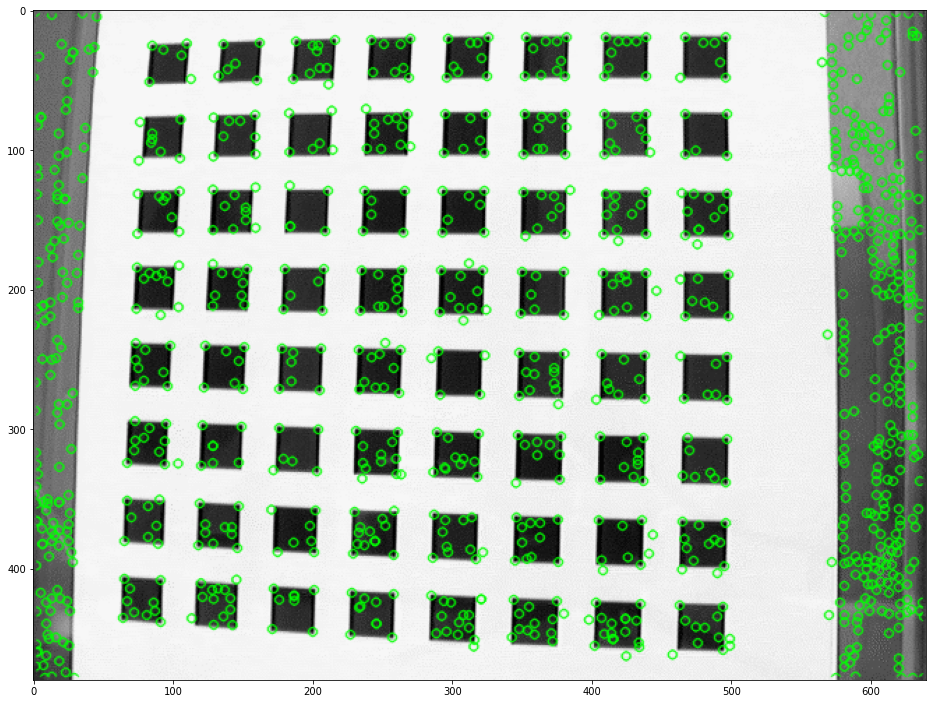

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,7020) # compute selected strong points   
       
## merge two list into tuple in coordinates format
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,PointList):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points # load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points) # compute refined coordinates
r = np.array(refined_locations)[:,0] # get refined row coordinates of Harris points
c = np.array(refined_locations)[:,1]  # get refined col coordinates of Harris points

## Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point
## initiate parameters of signature vector
x_refined = r
y_refined = c
lamda1 = [] # Eigenvalue 𝜆1
lamda2 = [] # Eigenvalue 𝜆2
v1 = [] # Eigenvector v1
v2 = [] # Eigenvector v2
𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)
𝜎𝐼 = [𝜎𝐼]*1000 # repeate 1000 times since for each location we used same detection scale 𝜎𝐼
coordinates = Selected_Points # load origial 1000 keypoint locations without refining
coordinates = np.array(coordinates) # convert to proper data type

## create funtion to compute signature vector
def signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx):
  x = coordinates[:,0] # row coordinates of Harris points
  y = coordinates[:,1]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  for i in range(len(theta)):
    s = ([x_refined.tolist()[i], y_refined.tolist()[i], theta[i], lamda1[i], lamda2[i], 𝜎𝐼[i]]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv

lamda1, lamda2, theta, sv = signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx)

## Show all detected points by generating keypoints and drawkeypoints
def draw_keypoints(x_refined,y_refined,𝜎𝐼,theta):
  ## keypoint parameters
  '''
  x	x-coordinate of the keypoint
  y	y-coordinate of the keypoint
  _size	keypoint diameter
  _angle	keypoint orientation
  _response	keypoint detector response on the keypoint (that is, strength of the keypoint)
  _octave	pyramid octave in which the keypoint has been detected
  _class_id	object id
  '''
  x_ = x_refined.tolist() # compute row coordinate to list
  y_ = y_refined.tolist() # compute col coordinate to list

  keypoint=[]
  for i in range(len(x_)):
    kp = cv2.KeyPoint(y_[i], x_[i], 𝜎𝐼[i], theta[i], 0, 0, -1) # compute keypoint, note: coordinate in (col,row) order

    keypoint.append(kp) # store all keypoints into a list

  ## flags parameter
  '''
    # DEFAULT = 0,
    # DRAW_OVER_OUTIMG = 1,
    # NOT_DRAW_SINGLE_POINTS = 2,
    # DRAW_RICH_KEYPOINTS = 4
  '''
  img2 = cv2.drawKeypoints(RGB,keypoint,RGB,color=(0,255,0), flags=0) # draw keypoints

  # Displaying the image 
  mp.figure(figsize = (16,16))
  mp.imshow(img2)
  mp.show()
  return 

draw_keypoints(x_refined,y_refined,𝜎𝐼,theta)


k) Show again all detected points but now draw ellipses instead of circles. Use the information of the first five values of the signature vector. (Hint: use ellipse())

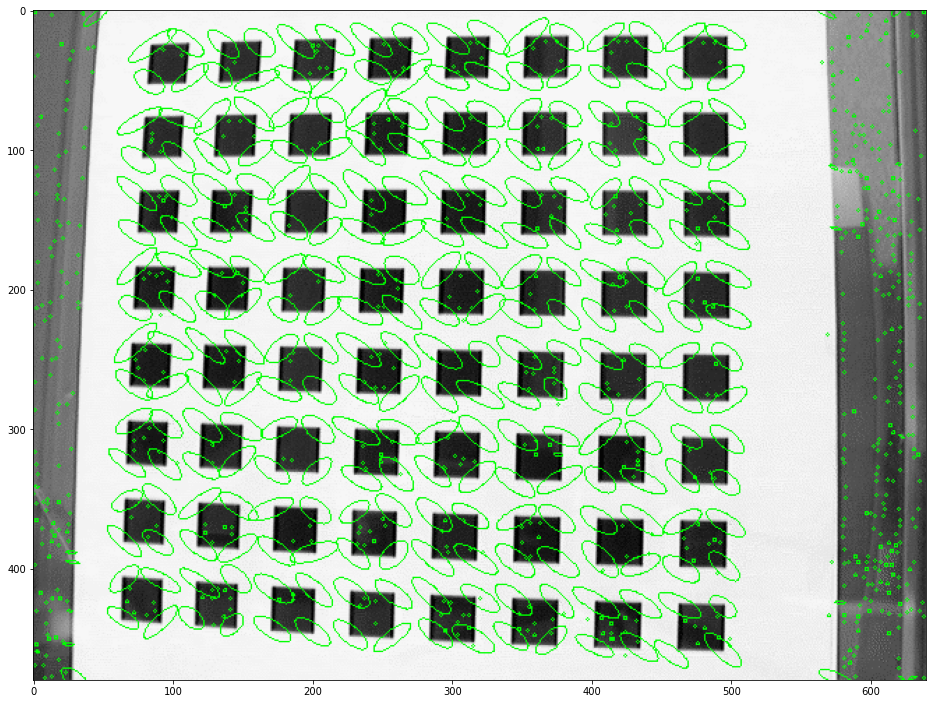

In [ ]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out


## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,7020) # compute selected strong points   
       
## Set the needed parameters to find the refined corners
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,Selected_Points):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points# load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points) # compute refined coordinates
r = np.array(refined_locations)[:,0] # get refined row coordinates of Harris points
c = np.array(refined_locations)[:,1]  # get refined col coordinates of Harris points

## Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point
## initiate parameters of signature vector
x_refined = r
y_refined = c
lamda1 = [] # Eigenvalue 𝜆1
lamda2 = [] # Eigenvalue 𝜆2
v1 = [] # Eigenvector v1
v2 = [] # Eigenvector v2
𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)
𝜎𝐼 = [𝜎𝐼]*1000 # repeate 1000 times since for each location we used same detection scale 𝜎𝐼
coordinates = Selected_Points # load origial 1000 keypoint locations without refining
coordinates = np.array(coordinates) # convert to proper data type

## create funtion to compute signature vector
def signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx):
  x = coordinates[:,0] # row coordinates of Harris points
  y = coordinates[:,1]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  for i in range(len(theta)):
    s = ([x_refined.tolist()[i], y_refined.tolist()[i], theta[i], lamda1[i], lamda2[i], 𝜎𝐼[i]]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv

lamda1, lamda2, theta, sv = signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx)

## Show detected points in ellipse according to signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
inversed_refined_coordinates = merge(c, r) # reorganise refined coordinates since cv2.ellipse requires in order (col, row) 
def draw_ellipse(inversed_refined_coordinates,lamda1,lamda2,theta):
  center_coordinates = inversed_refined_coordinates # reorganise refined coordinates since cv2.ellipse requires in order (col, row) 
  startAngle = 0
  endAngle = 360

  lamda1_n = [math.ceil(20*((float(i)/np.amax(lamda1)))) for i in lamda1] # normalize lamda1 and scale properly for drawing purpose
  lamda2_n = [math.ceil(20*((float(i)/np.amax(lamda2)))) for i in lamda2] # normalize lamda2 and scale properly for drawing purpose
  axesLength = merge(lamda1_n, lamda2_n) # organise eigenvalues into coordiates format to represent axes length of ellipse

  angle = theta # angle of ellipse 
  color = (0, 255, 0) # define the color of ellipse
  thickness = 1 # Line thickness of 1 px

  for i in range(len(angle)):
    image = cv2.ellipse(RGB, center_coordinates[i], axesLength[i], angle[i], startAngle, endAngle, color, thickness) # use cv2.ellipse to draw

  # Displaying the image 
  mp.figure(figsize = (16,16))
  mp.imshow(image)
  mp.show()
  return

draw_ellipse(inversed_refined_coordinates,lamda1,lamda2,theta)



# Verify the Harris algorithm using 001.jpg with 1000 strong points selected

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


1000


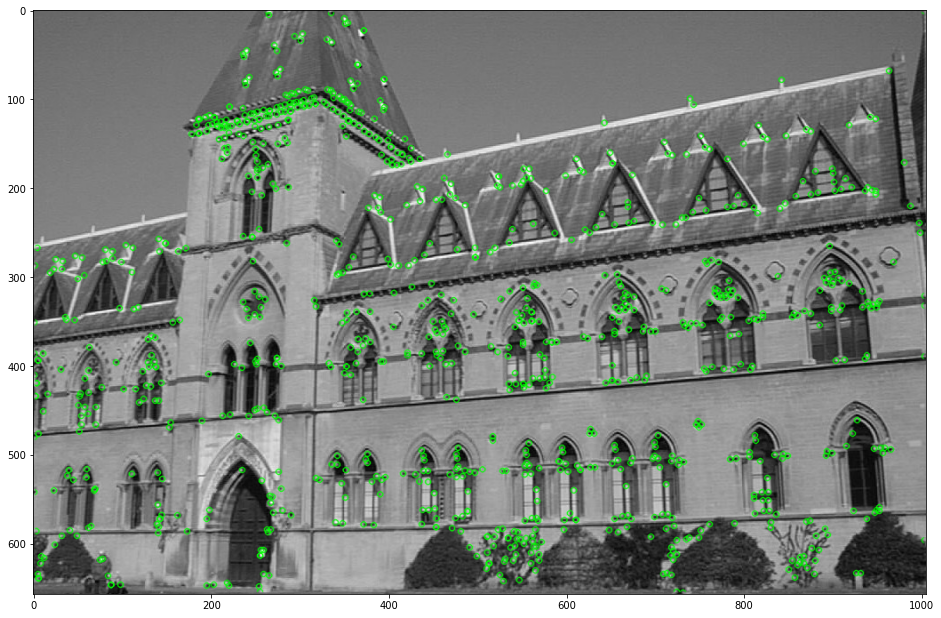

In [13]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,5690*10000) # compute selected strong points   
       
## merge two list into tuple in coordinates format
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,PointList):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points # load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points) # compute refined coordinates
r = np.array(refined_locations)[:,0] # get refined row coordinates of Harris points
c = np.array(refined_locations)[:,1]  # get refined col coordinates of Harris points

## Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point
## initiate parameters of signature vector
x_refined = r
y_refined = c
lamda1 = [] # Eigenvalue 𝜆1
lamda2 = [] # Eigenvalue 𝜆2
v1 = [] # Eigenvector v1
v2 = [] # Eigenvector v2
𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)

coordinates = Selected_Points # load origial 1000 keypoint locations without refining
coordinates = np.array(coordinates) # convert to proper data type

## create funtion to compute signature vector
def signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx):
  x = coordinates[:,0] # row coordinates of Harris points
  y = coordinates[:,1]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  for j in range(len(theta)):
    s = ([x_refined.tolist()[j], y_refined.tolist()[j], theta[j], lamda1[j], lamda2[j], 𝜎𝐼]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv

lamda1, lamda2, theta, sv = signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx)

## Show all detected points by generating keypoints and drawkeypoints
def draw_keypoints(x_refined,y_refined,𝜎𝐼,theta):
  ## keypoint parameters
  '''
  x	x-coordinate of the keypoint
  y	y-coordinate of the keypoint
  _size	keypoint diameter
  _angle	keypoint orientation
  _response	keypoint detector response on the keypoint (that is, strength of the keypoint)
  _octave	pyramid octave in which the keypoint has been detected
  _class_id	object id
  '''
  x_ = x_refined.tolist() # compute row coordinate to list
  y_ = y_refined.tolist() # compute col coordinate to list

  keypoint=[]
  for i in range(len(x_)):
    kp = cv2.KeyPoint(y_[i], x_[i], 𝜎𝐼, theta[i], 0, 0, -1) # compute keypoint, note: coordinate in (col,row) order

    keypoint.append(kp) # store all keypoints into a list

  ## flags parameter
  '''
    # DEFAULT = 0,
    # DRAW_OVER_OUTIMG = 1,
    # NOT_DRAW_SINGLE_POINTS = 2,
    # DRAW_RICH_KEYPOINTS = 4
  '''
  img2 = cv2.drawKeypoints(RGB,keypoint,RGB,color=(0,255,0), flags=0) # draw keypoints

  # Displaying the image 
  mp.figure(figsize = (16,16))
  mp.imshow(img2)
  mp.show()
  return 



print(len(Selected_Points)) # print number of selected points
draw_keypoints(x_refined,y_refined,𝜎𝐼,theta)


# Verify the Harris algorithm using CalibIm1.png image with different number of strong points selected

2000


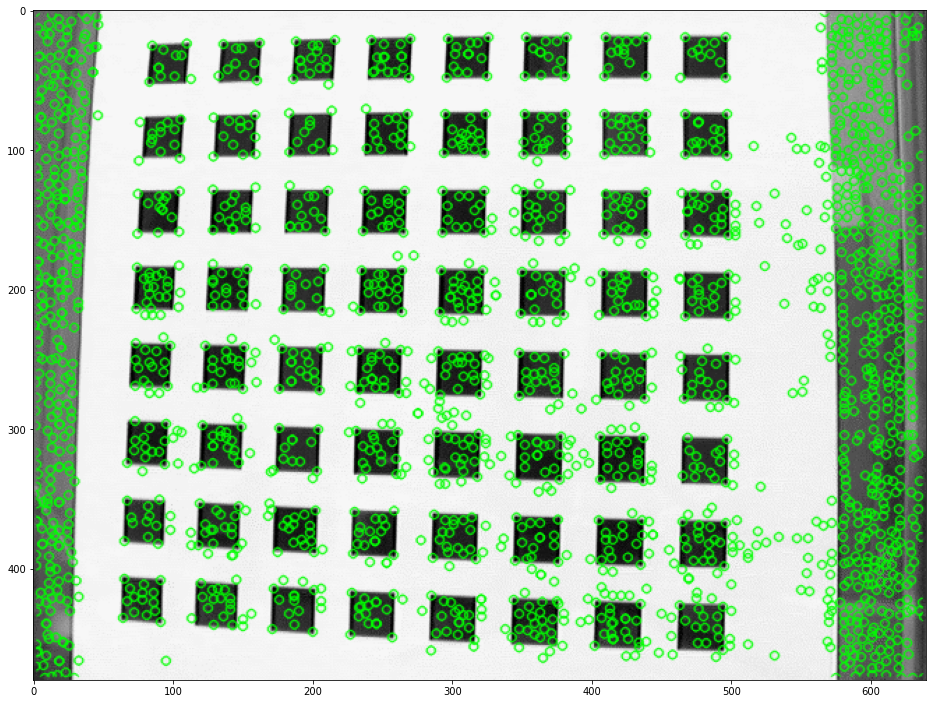

In [15]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,953) # compute selected strong points   
       
## merge two list into tuple in coordinates format
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,PointList):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points # load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points) # compute refined coordinates
r = np.array(refined_locations)[:,0] # get refined row coordinates of Harris points
c = np.array(refined_locations)[:,1]  # get refined col coordinates of Harris points

## Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point
## initiate parameters of signature vector
x_refined = r
y_refined = c
lamda1 = [] # Eigenvalue 𝜆1
lamda2 = [] # Eigenvalue 𝜆2
v1 = [] # Eigenvector v1
v2 = [] # Eigenvector v2
𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)

coordinates = Selected_Points # load origial 1000 keypoint locations without refining
coordinates = np.array(coordinates) # convert to proper data type

## create funtion to compute signature vector
def signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx):
  x = coordinates[:,0] # row coordinates of Harris points
  y = coordinates[:,1]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  for j in range(len(theta)):
    s = ([x_refined.tolist()[j], y_refined.tolist()[j], theta[j], lamda1[j], lamda2[j], 𝜎𝐼]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv

lamda1, lamda2, theta, sv = signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx)

## Show all detected points by generating keypoints and drawkeypoints
def draw_keypoints(x_refined,y_refined,𝜎𝐼,theta):
  ## keypoint parameters
  '''
  x	x-coordinate of the keypoint
  y	y-coordinate of the keypoint
  _size	keypoint diameter
  _angle	keypoint orientation
  _response	keypoint detector response on the keypoint (that is, strength of the keypoint)
  _octave	pyramid octave in which the keypoint has been detected
  _class_id	object id
  '''
  x_ = x_refined.tolist() # compute row coordinate to list
  y_ = y_refined.tolist() # compute col coordinate to list

  keypoint=[]
  for i in range(len(x_)):
    kp = cv2.KeyPoint(y_[i], x_[i], 𝜎𝐼, theta[i], 0, 0, -1) # compute keypoint, note: coordinate in (col,row) order

    keypoint.append(kp) # store all keypoints into a list

  ## flags parameter
  '''
    # DEFAULT = 0,
    # DRAW_OVER_OUTIMG = 1,
    # NOT_DRAW_SINGLE_POINTS = 2,
    # DRAW_RICH_KEYPOINTS = 4
  '''
  img2 = cv2.drawKeypoints(RGB,keypoint,RGB,color=(0,255,0), flags=0) # draw keypoints

  # Displaying the image 
  mp.figure(figsize = (16,16))
  mp.imshow(img2)
  mp.show()
  return 



print(len(Selected_Points)) # print number of selected points
draw_keypoints(x_refined,y_refined,𝜎𝐼,theta)


3505


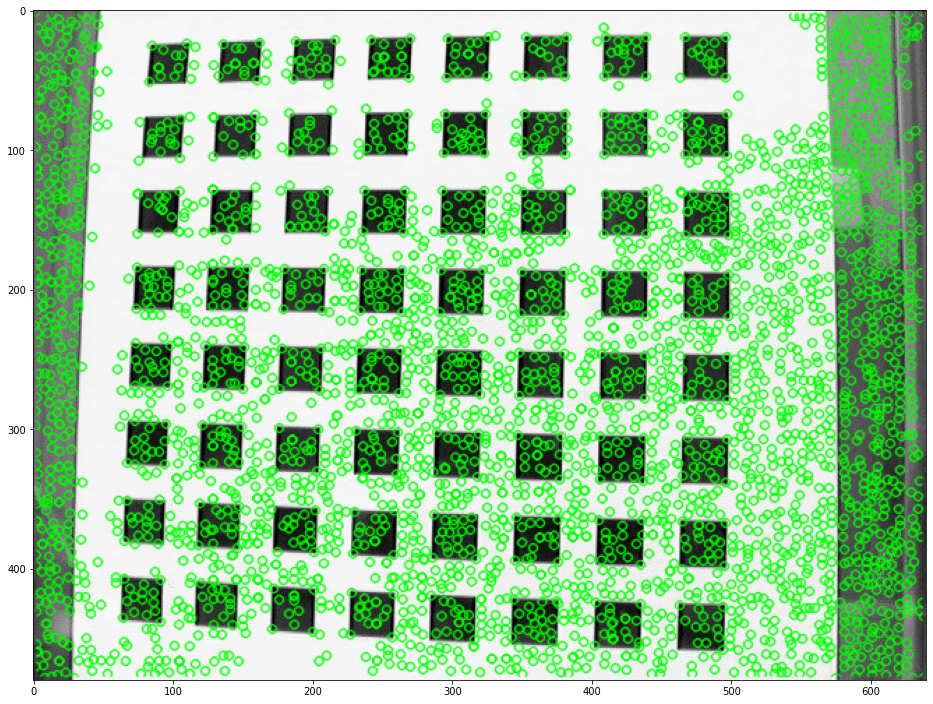

In [9]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out

## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                 Selected_Points.append((row, col)) # store the selected points
  return Selected_Points


Selected_Points=Strong_Corner(img,R,90.8) # compute selected strong points   
       
## merge two list into tuple in coordinates format
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,PointList):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = img # get gray image

  ## Order points
  points = Selected_Points # load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  return refined_locations

refined_locations = corner_refine(img,Selected_Points) # compute refined coordinates
r = np.array(refined_locations)[:,0] # get refined row coordinates of Harris points
c = np.array(refined_locations)[:,1]  # get refined col coordinates of Harris points

## Extract a signature vector 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼) for each Harris-point
## initiate parameters of signature vector
x_refined = r
y_refined = c
lamda1 = [] # Eigenvalue 𝜆1
lamda2 = [] # Eigenvalue 𝜆2
v1 = [] # Eigenvector v1
v2 = [] # Eigenvector v2
𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)

coordinates = Selected_Points # load origial 1000 keypoint locations without refining
coordinates = np.array(coordinates) # convert to proper data type

## create funtion to compute signature vector
def signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx):
  x = coordinates[:,0] # row coordinates of Harris points
  y = coordinates[:,1]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  for j in range(len(theta)):
    s = ([x_refined.tolist()[j], y_refined.tolist()[j], theta[j], lamda1[j], lamda2[j], 𝜎𝐼]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv

lamda1, lamda2, theta, sv = signature_vector(coordinates,Ixx,Iyy,Ixy,Iyx)

## Show all detected points by generating keypoints and drawkeypoints
def draw_keypoints(x_refined,y_refined,𝜎𝐼,theta):
  ## keypoint parameters
  '''
  x	x-coordinate of the keypoint
  y	y-coordinate of the keypoint
  _size	keypoint diameter
  _angle	keypoint orientation
  _response	keypoint detector response on the keypoint (that is, strength of the keypoint)
  _octave	pyramid octave in which the keypoint has been detected
  _class_id	object id
  '''
  x_ = x_refined.tolist() # compute row coordinate to list
  y_ = y_refined.tolist() # compute col coordinate to list

  keypoint=[]
  for i in range(len(x_)):
    kp = cv2.KeyPoint(y_[i], x_[i], 𝜎𝐼, theta[i], 0, 0, -1) # compute keypoint, note: coordinate in (col,row) order

    keypoint.append(kp) # store all keypoints into a list

  ## flags parameter
  '''
    # DEFAULT = 0,
    # DRAW_OVER_OUTIMG = 1,
    # NOT_DRAW_SINGLE_POINTS = 2,
    # DRAW_RICH_KEYPOINTS = 4
  '''
  img2 = cv2.drawKeypoints(RGB,keypoint,RGB,color=(0,255,0), flags=0) # draw keypoints

  # Displaying the image 
  mp.figure(figsize = (16,16))
  mp.imshow(img2)
  mp.show()
  return 



print(len(Selected_Points)) # print number of selected points
draw_keypoints(x_refined,y_refined,𝜎𝐼,theta)




# Bonus


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


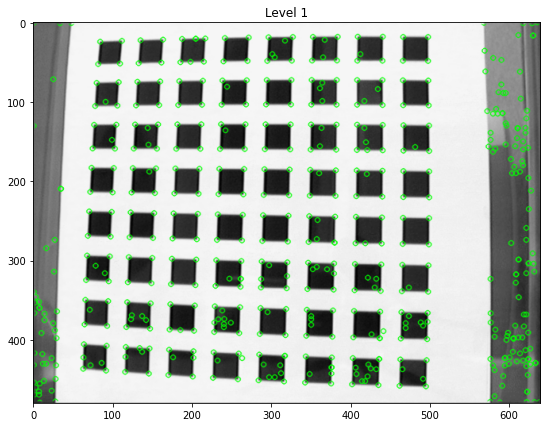

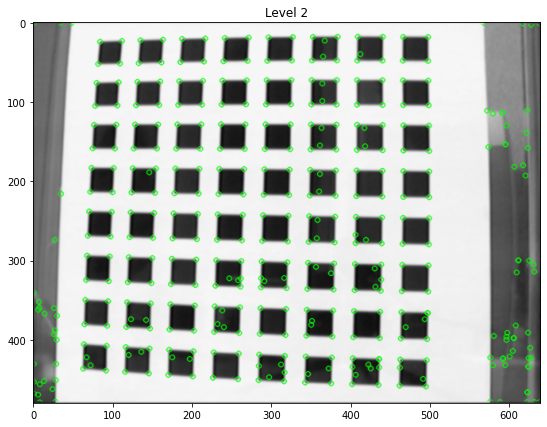

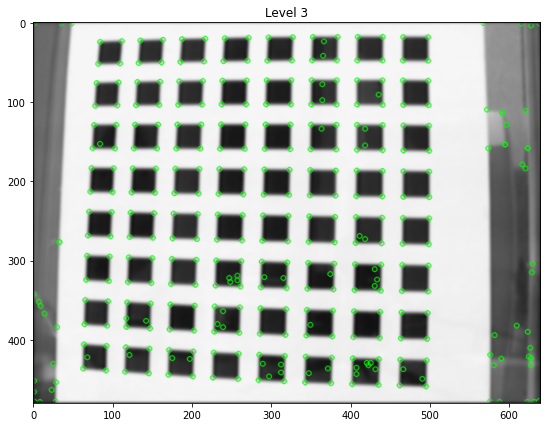

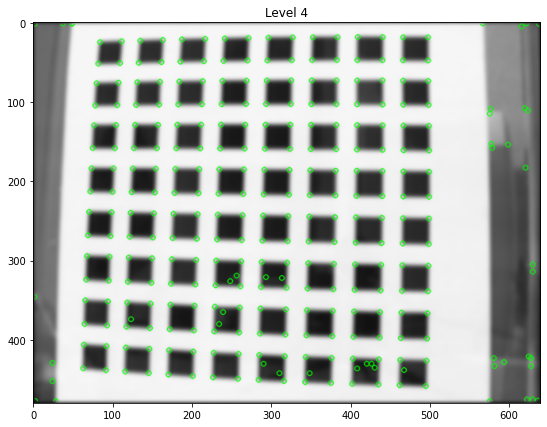

In [10]:
from matplotlib import pyplot as mp
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow

## loading image
# img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/001.jpg'
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Image/CalibIm1.PNG'
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)  

## create 2D gaussian kernel
def Gaussian_2D_Kernel(sigm): 

  K = 2.5 #  K is any value between 2.5 and 3
  Lon = math.floor(K*sigm) # half-size of the mask
  size = 2*K*sigm+1 # full-size of the mask
  G_= []
  for x in range(-Lon,Lon+1): # x is from [-Lon:Lon]
    G = np.exp(-x*x /(2 *sigm * sigm)) # 1D gaussian formula when k = 1
    G_.append(G) 
  sum_ = np.sum(G_) # compute the sum of output values
  G = np.array(G_ / sum_) # normalize to (0-1)

  return G[:, np.newaxis]*G[:, np.newaxis].T # compute 2D kernel by multiplying 1D kernel 


## create 2D convolution
def convolve(image, kernel):

    Hi, Wi = image.shape # get image size
    Hk, Wk = kernel.shape # get kernel size
    out = np.zeros((Hi, Wi))  # initiate output 
    
    pad_height = Hk // 2  # define the pading height
    pad_width = Wk // 2  # define the pading width

    pading = None
    pading = np.zeros((Hi+2*pad_height, Wi+2*pad_width))# fill zero 
    pading[pad_height:pad_height+Hi, pad_width:pad_width+Wi] = image # insert image to the center the border is filed by zero 
  

    h_flip = np.flip(np.flip(kernel, 0), 1) # np.flip funtion, parameter 0: flip up and down, parameter 1: flip left and right 

    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(np.multiply(h_flip, pading[i:(i+Hk), j:(j+Wk)])) # write the result after weighted summation
    # out = abs(out) # eliminate negative values
    # out = out*(255.0/out.max()) # normalize to [0-255]

    return out


## create image derivative operator
def Image_Derivative(img,fx=None,fy=None):
  ## create fx fy by using Prewitt kernel
  fx = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]),np.float32) # Prewitt kernel in vertical direction 

  fy = np.array((
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]),np.float32) # Prewitt kernel in horizontal direction 

  # compute Ix Iy Ixx Iyy Ixy by using convolve funtion implement by hand at a scale 𝜎𝐷 = 1.4𝜎0
  Ix = convolve(img, fx)
  Iy = convolve(img, fy)
  Ix = convolve(Ix, Gaussian_2D_Kernel(1.4*0.5))
  Iy = convolve(Iy, Gaussian_2D_Kernel(1.4*0.5))

  return Ix,Iy

# Ix,Iy = Image_Derivative(img,fx=None,fy=None)

## create second image derivative operator
def Image_2rd_Derivative(Ix,Iy):
  ## compute Ixx Iyy Ixy Iyx
  Ixx = np.square(Ix)
  Iyy = np.square(Iy)
  Ixy = np.multiply(Ix, Iy)
  Iyx = np.multiply(Ix, Iy)

  ## convolve the elements in ‘second moment’ matrix  with an isotropic 2D Gaussian 
  Ixx =  convolve(Ixx, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyy =  convolve(Iyy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Ixy =  convolve(Ixy, Gaussian_2D_Kernel(1.4*0.5*1.5))
  Iyx =  convolve(Iyx, Gaussian_2D_Kernel(1.4*0.5*1.5))

  return Ixx, Iyy, Ixy, Iyx

# Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy)

## compute Harris-feature map
def Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx):
  w,h = img.shape # get image size
  k = 0.06 # k is the sensitivity factor to separate corners from edges，typically a value close to zero
  R = np.zeros((w, h), np.float32) # initiate R array 
      
  for row in range(w):
    for col in range(h):
      M = np.array([[Ixx[row][col], Ixy[row][col]], [Iyx[row][col], Iyy[row][col]]]) # compute Harris matrix: M
      R[row][col] = np.linalg.det(M) - (k * np.square(np.trace(M))) # compute Harris-feature map: R
  return R

# R = Harris_feature_map(img,Ixx,Iyy,Ixy,Iyx)


## Covert image to color 
RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

## create Non-Maxima suppression funtion
def Strong_Corner(img,R,threshold): 
  Threshold = threshold # select first 1000 Strong Corner    
  Selected_Points = [] 
  w,h = img.shape # get image size
  for row in range(w): 
      for col in range(h):
          if R[row][col] > Threshold:
              local_maxima = R[row][col] # Identify the local maxima

              # Local non-maxima suppression
              jump_to_next = False
              for i in range(5): # define the window size 
                  for k in range(5): # define the window size 
                      if row + i - 2 < w and col + k - 2 < h:
                          if R[row + i - 2][col + k - 2] > local_maxima: # if response is highest in a neighborhood than keep it  
                              jump_to_next = True
                              break

              if not jump_to_next:
  
                #  Selected_Points.append((row, col)) # store the selected points
                 Selected_Points.append((col, row)) # store the selected points
  return Selected_Points


# Selected_Points=Strong_Corner(img,R,7020) # compute selected strong points   


## Set the needed parameters to find the refined corners
def merge(list1, list2):
  merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
  return merged_list

## define corner refine funtion
def corner_refine(img,Selected_Points):
  winSize = (5, 5) # window of size 5x5.
  zeroZone = (-1, -1)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 40, 0.001)  # termination criteria
  gray = np.float32(img) # get gray image

  ## Order points
  points = Selected_Points# load 1000 keypoint locations from previous step
  points = np.array(points, dtype='float32') # convert to proper data type

  ## Calculate the refined corner locations
  corners = cv2.cornerSubPix(gray, points, winSize, zeroZone, criteria)

  ## Convert output refined corner locations into tuple
  r = corners[:,0] # get row locations
  c = corners[:,1] # get column locations
  refined_locations = merge(r, c)
  # refined_locations = merge(c, r)
  return refined_locations




𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)

## create funtion to compute signature vector
def signature_vector(img, Selected_Points,Ixx,Iyy,Ixy,Iyx):
  lamda1 = [] # Eigenvalue 𝜆1
  lamda2 = [] # Eigenvalue 𝜆2
  v1 = [] # Eigenvector v1
  v2 = [] # Eigenvector v2
  𝜎𝐼 = 0.5*1.4*1.5      # detection scale 𝜎𝐼=1.5𝜎𝐷  (𝜎𝐷 = 1.4𝜎0  𝜎0=0.5)
  𝜎𝐼 = [𝜎𝐼]*1000 # repeate 1000 times since for each location we used same detection scale 𝜎𝐼


  x = np.array(Selected_Points)[:,1] # row coordinates of Harris points
  y = np.array(Selected_Points)[:,0]  # col coordinates of Harris points
  x_v = [1,0] # vector of the axis x of the image

  ## compute Eigenvalues and Eigenvectors
  for i in range(len(x)):
    M = np.array([[Ixx[x[i]][y[i]], Ixy[x[i]][y[i]]], [Iyx[x[i]][y[i]], Iyy[x[i]][y[i]]]]) # compute Harris matrix M which is associated selected 1000 points
    w, v = np.linalg.eig(M) # compute Eigenvalues and Eigenvectors
    lamda1.append(w[0]) # store eigenvalues lamda 1
    lamda2.append(w[1]) # store eigenvalues lamda 2
    v1.append(v[0]) # store eigenvectors vector 1
    v2.append(v[1]) # store eigenvectors vector 2

  ## compute eigenvector associated with the highest eigenvalue
  max_v = [] 
  for k in range(len(lamda1)): 
    if lamda1[k] > lamda2[k]: # compare values of two eigenvalues
      max_v.append(v1[k]) # store eigenvector which has higher eigenvalue 
    else:
      max_v.append(v2[k]) # store eigenvector which has higher eigenvalue 

  ## compute region orientation 𝜃 between the eigenvector associated with the highest eigenvalue and the axis x of the image
  theta  = [] # angle in degrees
  for g in range(len(max_v)):
    dot_product = np.dot(x_v, max_v[g]) # compute dot product of two vector
    arccos = np.arccos(dot_product) # compute arccos values from dot product values
    angle = math.degrees(arccos) # get angle in degree
    theta.append(angle) # store all angles 

  ## Extract a signature vector: 𝑆𝑉 = (𝑥, 𝑦, 𝜃, 𝜆1, 𝜆2, 𝜎𝐼)
  sv = []
  refined_locations = corner_refine(img,Selected_Points) 
  for i in range(len(theta)):
    s = ([((np.array(refined_locations)[:,1]).tolist())[i], ((np.array(refined_locations)[:,0]).tolist())[i], theta[i], lamda1[i], lamda2[i], 𝜎𝐼[i]]) # assign values to signature vector
    sv.append(s) 

  return lamda1,lamda2,theta,sv



# create 4 levels gaussian scale-space
def gaussianPyr(img,levels):
  
    # img = img[0: np.power(2, levels) * int(img.shape[0] / np.power(2, levels)),
    #         0: np.power(2, levels) * int(img.shape[1] / np.power(2, levels))]
    temp_img = img.copy() # copy the image

    ## initiate lists to store the output
    pyr = [] 
    coordinate = [] 
    angle = []
    lamda1 = []
    lamda2 = []
   
    sigma = 0.5 # assume 𝜎0 = 0.5 
    for i in range(levels):
        sigma = sigma*1.4  # smoothing sigma 𝜎𝑘 = 1.4 × 𝜎𝑘−1, 𝑘 = 1,2,3,4
        temp_img = convolve(temp_img, Gaussian_2D_Kernel(sigma)) # smooth image at each level

        ## downsampling the image
        '''
        # scale_percent = 50 # down-sampling 
        # width = int(temp_img.shape[1] * scale_percent / 100)
        # height = int(temp_img.shape[0] * scale_percent / 100)
        # dim = (width, height) 
        # temp_img = cv2.resize(temp_img, dim, interpolation = cv2.INTER_AREA) 
        '''

        Ix,Iy = Image_Derivative(temp_img,fx=None,fy=None) # compute derivative at each scale
        Ixx, Iyy, Ixy, Iyx = Image_2rd_Derivative(Ix,Iy) # compute derivative at each scale
        R = Harris_feature_map(temp_img,Ixx,Iyy,Ixy,Iyx) # compute Harris response at each scale
        Selected_Points=Strong_Corner(temp_img,R,7020) # compute selected strong points locations at each scale
        refined_locations = corner_refine(temp_img,Selected_Points) # compute refined coordinates at each scale
        lamda1, lamda2, theta, sv = signature_vector(temp_img,Selected_Points,Ixx,Iyy,Ixy,Iyx) # compute signature vector at each scale

        ## store the output
        pyr.append(temp_img)
        coordinate.append(refined_locations)
        angle.append(theta)
        lamda1.append(lamda1)
        lamda2.append(lamda2)

    return np.array(pyr, dtype=object), np.array(coordinate, dtype=object), np.array(lamda1, dtype=object), np.array(lamda2, dtype=object), np.array(angle, dtype=object)


out_images, point, lamda1, lamda2, theta = gaussianPyr(img,4)


## Show all detected points by generating keypoints and drawkeypoints
def draw_keypoints(out_images, x_refined,y_refined,𝜎𝐼,theta):
  out = []
  out_images = np.uint8(out_images) 
  x_ = (np.array(x_refined)[:,1]).tolist() # compute row coordinate to list
  y_ = (np.array(y_refined)[:,0]).tolist() # compute col coordinate to list

  keypoint=[]
  for i in range(len(x_)):
    kp = cv2.KeyPoint(y_[i], x_[i], 𝜎𝐼, theta[i], 0, 0, -1) # compute keypoint, note: coordinate in (col,row) order

    keypoint.append(kp) # store all keypoints into a list

  img2 = cv2.drawKeypoints(out_images,keypoint,out_images,color=(0,255,0), flags=0) # draw keypoints

  return img2

## Displaying the image 
for i in range(4):
  output = draw_keypoints(out_images[i],point[i],point[i],𝜎𝐼,theta[i])
  mp.figure(figsize = (20,20))
  mp.subplot(2, 2, i+1) 
  mp.title(f'Level {i+1}')
  mp.imshow(output)
  mp.show()  

